In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
df = pd.read_csv('banana_quality.csv') #IMPORTING THE DATASET
df.head(8000) #VIEWING THE FIRST 5 ROWS OF THE DATASET

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good
...,...,...,...,...,...,...,...,...
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad


In [4]:
df.info()#checks for any mismatch in the data type in this case the Quality
df.describe()#show the stats of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


Text(0.5, 1.0, 'Banana Quality Distribution')

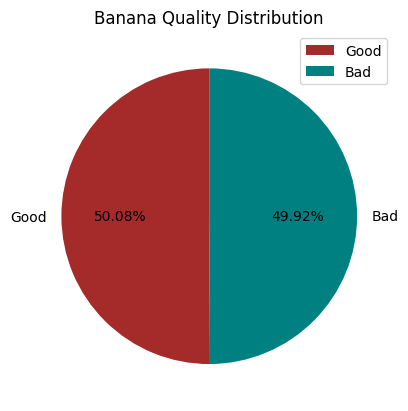

In [5]:
#Shows the distribution of banana quality
plt.pie(x=df["Quality"].value_counts(), labels=df["Quality"].value_counts().index, startangle=90, autopct='%0.2f%%', colors=['brown', 'teal'])
plt.legend()
plt.title('Banana Quality Distribution')

In [6]:
#Changes Good to 1 and Bad to 0 to quantify the quality of the banana
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Quality'] = label_encoder.fit_transform(df['Quality'])
df.head(8000)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1
...,...,...,...,...,...,...,...,...
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,0
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,0
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,0
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,0


1 - LogisticRegression accuracy:  87.9375 %
2 - KNeighborsClassifier accuracy:  98.0625 %
3 - SVC accuracy:  98.125 %
4 - GaussianNB accuracy:  89.125 %
5 - BernoulliNB accuracy:  82.0625 %
6 - DecisionTreeClassifier accuracy:  93.875 %
7 - RandomForestClassifier accuracy:  97.4375 %
8 - ExtraTreesClassifier accuracy:  97.875 %
9 - AdaBoostClassifier accuracy:  89.25 %
10 - MLPClassifier accuracy:  98.625 %


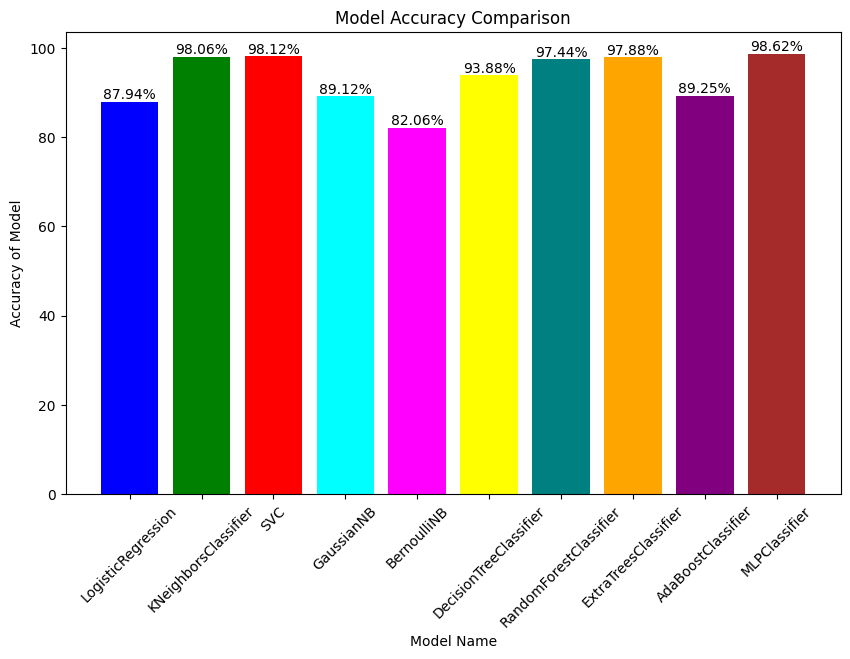

In [13]:
#Setting the variables, X defines the features to be tested and y for the variable you want to predict
X = df.drop(['Quality'], axis=1).values #drops the quality so all the other features are called as X
y = df['Quality'].values #calls quality as y

#Creating the variables to train and test with a test size 20% equal to the random state 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Since were are predicting if the banana quality is good or bad, typical models of classifications are chosen
models = [LogisticRegression(), KNeighborsClassifier(), SVC(), GaussianNB(), BernoulliNB(), DecisionTreeClassifier()
             , RandomForestClassifier(), ExtraTreesClassifier(), AdaBoostClassifier(n_estimators=50, algorithm='SAMME'), MLPClassifier(max_iter=500)]
name = [] #Saves the name of the model in a list
results = [] #Saves the results of accuracy in a list
count = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] #Used to number the print
c = -1 #Instantiates c = -1

#Instead of instantiating the models one by one, a for loop is used to make code shorter
for i in models: 
    c = c + 1 #Adds 1 to variable c every loop so that the number counts in the print
    reg = i.fit(X_train, y_train) #Fits the classifier to the data to train
    m_name = reg.__class__.__name__ #Instantiates the name of the model in order to classify it when we print
    y_pred = reg.predict(X_test) #Sets the prediction in the model
    accuracy = accuracy_score(y_test, y_pred)*100 #Instantiates the accuracy of each models, multiplied by a hundred to show the percent
    
    name.append(m_name) #returns the model name in the name list outside the for loop
    results.append(accuracy) #returns the accuracy in the results list outside the for loop
    
#Prints the accuracy formatted in a way to show the number, model name then accuracy rounded to the hundrenths decimal place.
    print(count[c],'-',m_name,'accuracy: ',round(accuracy, 5),'%') 

#Plots the accuracy for better representation and analysis
plt.figure(figsize=(10,6))
bars = plt.bar(name, results, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'teal', 'orange', 'purple', 'brown'])
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
plt.xlabel('Model Name')
plt.ylabel('Accuracy of Model')
plt.title('Model Accuracy Comparison')

#Used to show the accuracies of each model for better interpretation of the graph
for bar, result in zip(bars, results):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{round(result, 2)}%', 
             ha='center', va='bottom')
    
plt.show()

In [447]:
#Selected the model with the highest accuracy to check the prediction
f = MLPClassifier(alpha=1, random_state=42).fit(X_train, y_train)
y_pred_f = f.predict(X_test)
accuracy_f = accuracy_score(y_test, y_pred_f)
print('Model with Highest Accuracy: ',round(accuracy, 2),'%') 

Model with Highest Accuracy:  98.38 %


In [424]:
#Prints the classification report for further analysis
print(classification_report(y_test, y_pred_f))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       781
           1       0.98      0.98      0.98       819

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



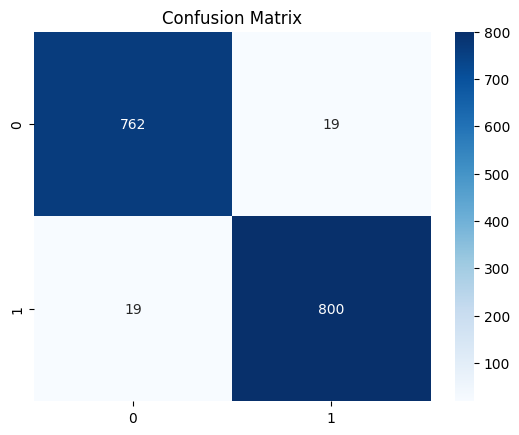

In [425]:
# Assuming y_test and y_pred_f are your actual and predicted labels, respectively
conf_matrix = confusion_matrix(y_test, y_pred_f)

# Plot confusion matrix as heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.title('Confusion Matrix')

# Show plot
plt.show()

In [426]:
#Instantiates the roc_auc curve in for better representation of data in prediction
y_prob = f.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

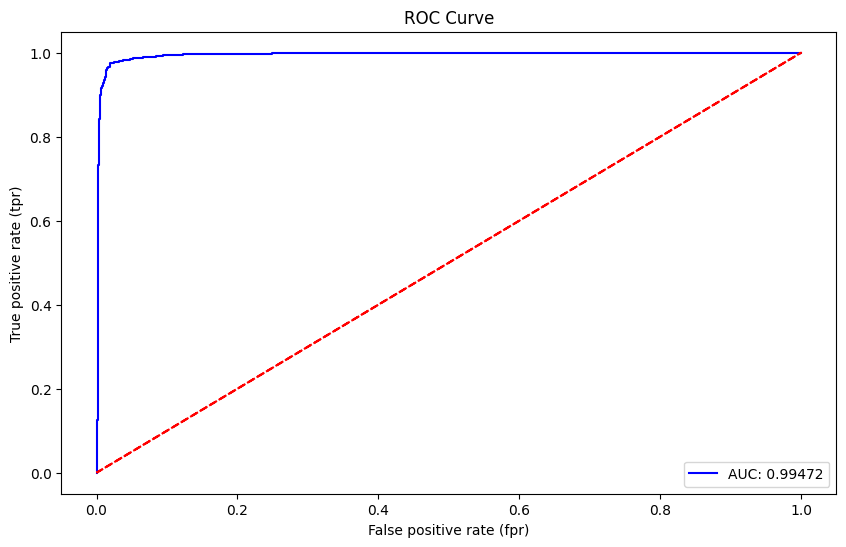

In [443]:
#Plots the curve for better representation, True positive meaning you have told the user about the quality of the banana then turns out to be true
#Additionally, false positive being you told the user about the quality of the banana then turns out to be false.
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color="blue", label= f"AUC: {round(roc_auc, 5)}")
plt.plot(y_test, y_test, color="r", linestyle="--")
plt.title("ROC Curve")
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.legend()
plt.show()